Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [ ]:
NOM = "Martinez"
PRENOM = "Maud"
GROUPE = "3"
DATE = "17/04/2019"

---

# TP 10 : Statistiques et le module Pandas


## Exercice 1: Marche aléatoire à 1D:

Dans cet exercice il s'agit de simuler une marche aléatoire dans un espace unidimensionnel. Vous pourrez reprendre des parties de code écrites lors des TD précédents. Au début la particule se trouve dans la position $x=0$ et à chaque étape la particule se déplace aléatoirement d'une quantité $dx$ comprise dans l'intervalle [-1,1[.
1. Représentez sur un histogramme (voir `pyplot.hist`) la position finale de 300 particules après 600 pas. Calculez la valeur moyenne des positions finales ainsi que l'écart type.
2. Définissez une fonction gaussienne 
	$$ f(x)= \frac{A}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\bar{x})^2}{2\sigma^2}}$$
Calculez cette fonction dans le domaine des $x$ défini par les extrêmes de votre distribution des positions finales des particules. Vous prendrez pour $\bar{x}$ et $\sigma$ la moyenne et l'écart type calculés précédemment. Pour $A$ vous choisirez la valeur:
$$A=\frac{X}{N_{bins}}\times N_{particules}$$
où $X$ est la largeur du domaine des $x$ calculés, $N_{bins}$ est le nombre d'intervalles utilisés pour construire l'histogramme et $N_{particules}$ est le nombre de particules. 
3. Représentez $f(x)$ sur votre graphique précédent. Que pouvez-vous en déduire sur la distribution des positions finales?

-0.0035295491506667173 14.254515897893945


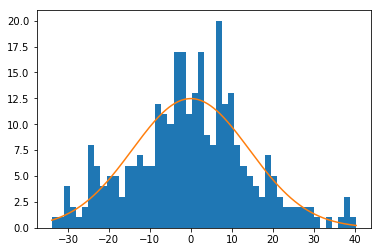

In [11]:
import numpy as np
from matplotlib import pyplot as pt

arrive= []

for p in range(301) :
    point= 0
    for i in range(601) :
        dx= np.random.uniform(-1,1)
        point += dx
         
    arrive.append(point)
    
mu = np.mean(arrive)
sigma = np.std(arrive)
mini= np.amin(arrive)
maxi= np.amax(arrive)
print(mu, sigma)
inter = 50

def f(x) :
    
    A= (maxi-mini)*300/inter
    return A* np.exp(-((x-mu)**2/(2*sigma**2)))/(((2*np.pi)**0.5)*sigma)   

X = np.linspace(mini,maxi,300)
Y = f(X)

fig =pt.figure()
pt.hist(arrive, bins= inter)
pt.plot(X,Y)
pt.show()


## Exercice 2: Les communes de France:

 
Dans cet exercice il s'agit d'analyser une base de données qui comprend une trentaine d'indicateurs décrivant la population, les logements, les revenus, l'emploi et les établissements des communes de France. 
Ces données se trouvent dans le fichier communes.csv.
Ces données sont librement accessibles également sur le site de l'INSEE (https://www.insee.fr/fr/statistiques/2521169). La librairie pandas est un outils trés puissant: les questions suivantes peuvent être résolues en seulement une ou deux lignes! 
 
1. Importer le fichier communes.csv.
2. Analyser le titre des colonnes. Re-importer le fichier en utilisant le nom de la commune comme indice de référence pour les lignes.
3. Combien de communes y a-t-il en France?
4. Quelle est la population de la ville de Nantes?
5. Dans quelle région se trouve "Le Diamant''?
6. Comment a évolué la population Française entre 2009 et 2014?
7. Donner la moyenne, l'écart-type  et la médiane de la population des communes de France. Pourquoi la moyenne ne donne pas toujours une bonne représentation des données ?
8. Combien de communes ont-elles moins de 100 habitants?
9. Quelles sont les communes les moins peuplées de France?
10. Quelle est la commune la plus peuplée? 
11. Dériver le bilan migratoire de chaque commune en regard la population en 2014 et en 2009 ainsi que les taux de décès et de naissances pendant cette période. Combien de personnes ont-elles quitté Paris pendant cette période?
12. Définir un nouveau DataFrame dans lequel on enregistrera les densités de population des communes et leur département. Nommer les deux colonnes "Densité'' et "Département''.
13. Quelle est la commune avec la plus haute densité d'habitants en France?
14. Grouper les données des communes par département. Quel est le département le plus peuplé? 
15. Ordonner par ordre croissant les valeurs par département (voir la fonction `sort_values()`) et représenter cette information par un diagramme à barres.
16. Grouper les données par région. Représenter sur un diagramme circulaire la population en 2014 des différentes régions. Utiliser le fichier regions2019.csv pour légender le diagramme.

In [64]:
import pandas as pd

com= pd.read_csv("communes.csv", index_col= 'Nom')

#com.shape()
#com.loc['Nantes']
#com.loc['Le Diamant']

#p2009 = com["Population en 2009"].sum() 
#p2014 = com["Population en 2014"].sum()
#evo = p2014 - p2009
#print(evo)

#com["Population en 2014"].describe()

#com100 = com[com["Population en 2014"] < 100]
#print(com100.shape)

#com00 = com[com["Population en 2014"]<= 0.0]
#print(com00)

#com["Population en 2014"].idxmax()

#bilan_migratoire = com["Population en 2014"]-com["Population en 2009"]- (com["Naissances entre 2009 et 2014"]-com["Décès entre 2009 et 2014"])
#print(bilan_migratoire)
#bilan_migratoire.loc['Paris']

#com
densité= com["Population en 2014"]/com["Superficie"]
dfDEP= pd.concat( [com["Département"], densité], axis= 1, keys =["Département","Densité"])
dfDEP['Densité'].idxmax()



/public/methnum/miniconda3/envs/methnum/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'Levallois-Perret'

## Exercice 3: Les prénoms:

 
Dans cet exercice il s'agit d'analyser une base de données qui porte sur les prénoms donnés à Paris entre 2004 et 2018. 
Ces données se trouvent dans le fichier liste_des_prenoms.csv.
Ces données sont librement accessibles également sur le site opendata de la ville de Paris (https://opendata.paris.fr/explore/dataset/liste_des_prenoms).  
 
1. Importer le fichier liste_des_prenoms.csv.
2. Analyser les données contenues dans le fichier. Afficher les 10 premières lignes du fichier (voir `df.head()`).
3. Combien de prénoms féminins et masculins y-a-t-il dans ce fichier? Quel est le prénom masculin le plus déclaré ? en quelle année ?
Quel est le prénom féminin le plus déclaré ? en quelle année ?
4. Combien y-a-t-il de prénoms composés ? (On pourra éventuellement utiliser `Series.str.contains()` du module Pandas.)
5. Afficher les données correspondant à votre prénom .
6. Afficher Les prénoms épicènes ou mixtes, combien y-en a-t-il? (On pourra éventuellement utiliser `df.merge()` et `Series.duplicated()` du module Pandas.)

In [70]:
pren= pd.read_csv("liste_des_prenoms.csv", sep=";")

In [71]:
pren.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19161 entries, 0 to 19160
Data columns (total 5 columns):
Nombre                           19161 non-null int64
Sexe                             19161 non-null object
Annee                            19161 non-null int64
Prenoms                          19161 non-null object
Nombre total cumule par annee    19161 non-null int64
dtypes: int64(3), object(2)
memory usage: 748.6+ KB


In [72]:
pren.head(10)

,Nombre,Sexe,Annee,Prenoms,Nombre total cumule par annee
0,15,M,2016,Bastien,289
1,5,F,2006,Baya,5
2,10,F,2016,Baya,57
3,5,F,2006,Béatrice,16
4,5,F,2012,Béatrice,36
5,7,F,2015,Bella,24
6,7,M,2017,Ben,122
7,8,M,2018,Ben,130
8,117,M,2004,Benjamin,117
9,88,M,2013,Benjamin,918


In [80]:
prenon = pren.groupby("Prenoms")
Mas=prenon[prenon["Sexe"] == "M"]
Fem=prenon[prenon["Sexe"] == "F"]

Mas.shape()
Fem.shape()

KeyError: 'Column not found: False'